In [42]:
import os
import tqdm
import cv2
from PIL import Image
from PIL.ImageEnhance import Contrast, Brightness
from pathlib import Path
import matplotlib.pyplot as plt

IMAGE_DATASET_FOLDER = Path('..\data\d2\images')

In [27]:
image_d2_bgr = cv2.imread('../data/d2/images/1_image.jpg')
lab_image = cv2.cvtColor(image_d2_bgr, cv2.COLOR_BGR2Lab)

#L (luminância) e AB (canais de cor)
l_channel, a_channel, b_channel = cv2.split(lab_image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_l = clahe.apply(l_channel)

lab_equalized = cv2.merge((equalized_l, a_channel, b_channel))

clahe_image = cv2.cvtColor(lab_equalized, cv2.COLOR_Lab2BGR)

#sometimes, the best way of visualizing
#cv2.imwrite('clahe_image.jpg', output_image)

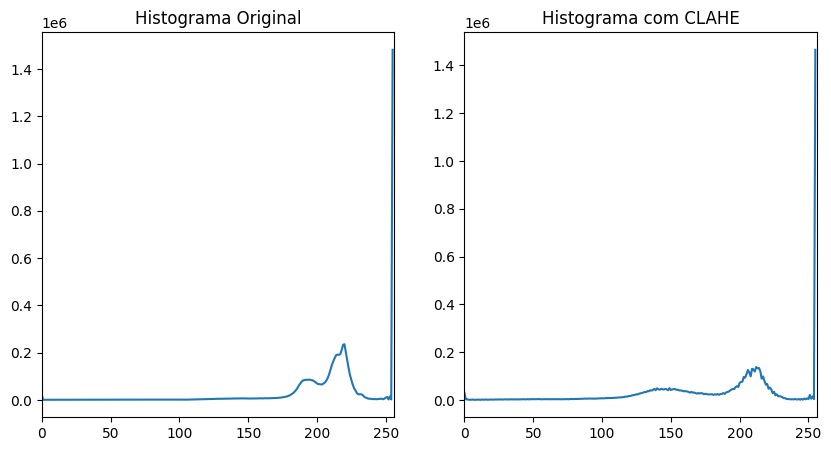

In [28]:
hist_d2_bgr = cv2.calcHist([image_d2_bgr], [0], None, [256], [0, 256])
hist_d2_clahe = cv2.calcHist([clahe_image], [0], None, [256], [0, 256])

# Plot do histograma antes do CLAHE
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Histograma Original')
plt.plot(hist_d2_bgr)
plt.xlim([0, 256])

# Plot do histograma depois do CLAHE
plt.subplot(122)
plt.title('Histograma com CLAHE')
plt.plot(hist_d2_clahe)
plt.xlim([0, 256])

plt.show()

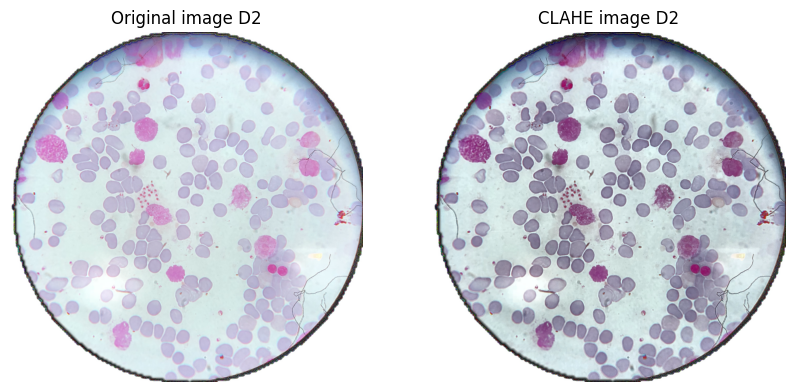

In [30]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original image D2')   # ambas as imagens em bgr para facilitar a visualização do contraste
plt.imshow(image_d2_bgr)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('CLAHE image D2')
plt.imshow(clahe_image)
plt.axis('off')

plt.show()

## Comparison: D1 and D2 images and its contrast enhacements

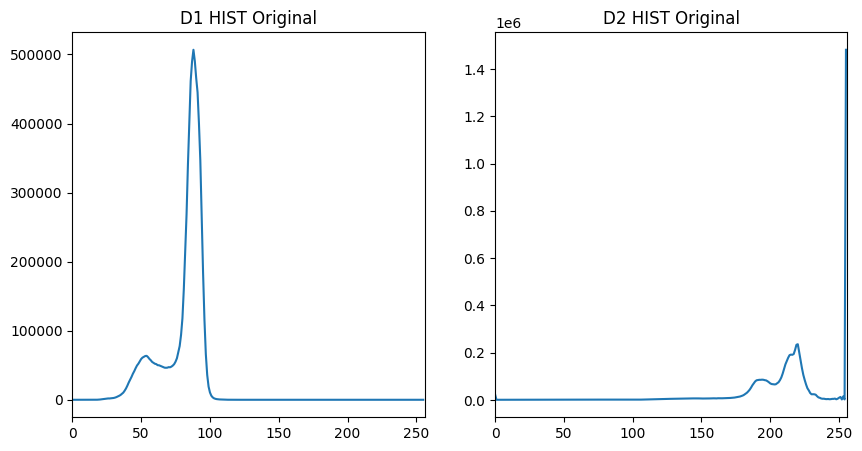

In [35]:
image_d1_bef = cv2.imread('../data/d1-not-preproc/D (1).JPG')
hist_image_d1_bef = cv2.calcHist([image_d1_bef], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('D1 HIST Original')
plt.plot(hist_image_d1_bef)
plt.xlim([0, 256])

plt.subplot(122)
plt.title('D2 HIST Original')
plt.plot(hist_d2_bgr)
plt.xlim([0, 256])

plt.show()

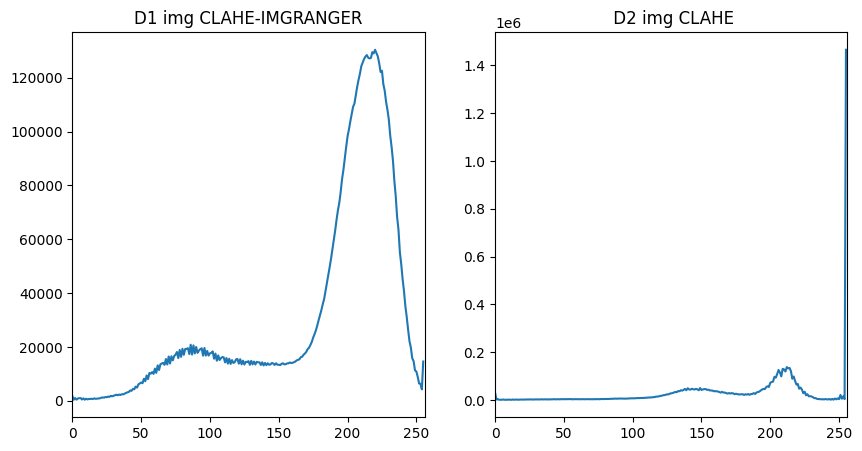

In [39]:
image_D1 = cv2.imread('../data/d1/images/D1.JPG')
hist_image_d1 = cv2.calcHist([image_D1], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('D1 img CLAHE-IMGRANGER')
plt.plot(hist_image_d1)
plt.xlim([0, 256])

plt.subplot(122)
plt.title(' D2 img CLAHE')
plt.plot(hist_d2_clahe)
plt.xlim([0, 256])

plt.show()

## Reproducing CLAHE in D1 img

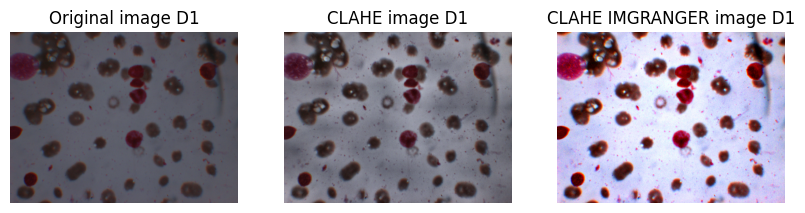

In [40]:
lab_d1_image = cv2.cvtColor(image_d1_bef, cv2.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv2.split(lab_d1_image)
equalized_l = clahe.apply(l_channel)
lab_equalized = cv2.merge((equalized_l, a_channel, b_channel))
clahe_d1_image = cv2.cvtColor(lab_equalized, cv2.COLOR_Lab2BGR)
# cv2.imwrite('clahe_d1_image.jpg', clahe_d1_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original image D1')   # ambas as imagens em bgr para facilitar a visualização do contraste
plt.imshow(image_d1_bef)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('CLAHE image D1')
plt.imshow(clahe_d1_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('CLAHE IMGRANGER image D1')
plt.imshow(image_D1)
plt.axis('off')

plt.show()

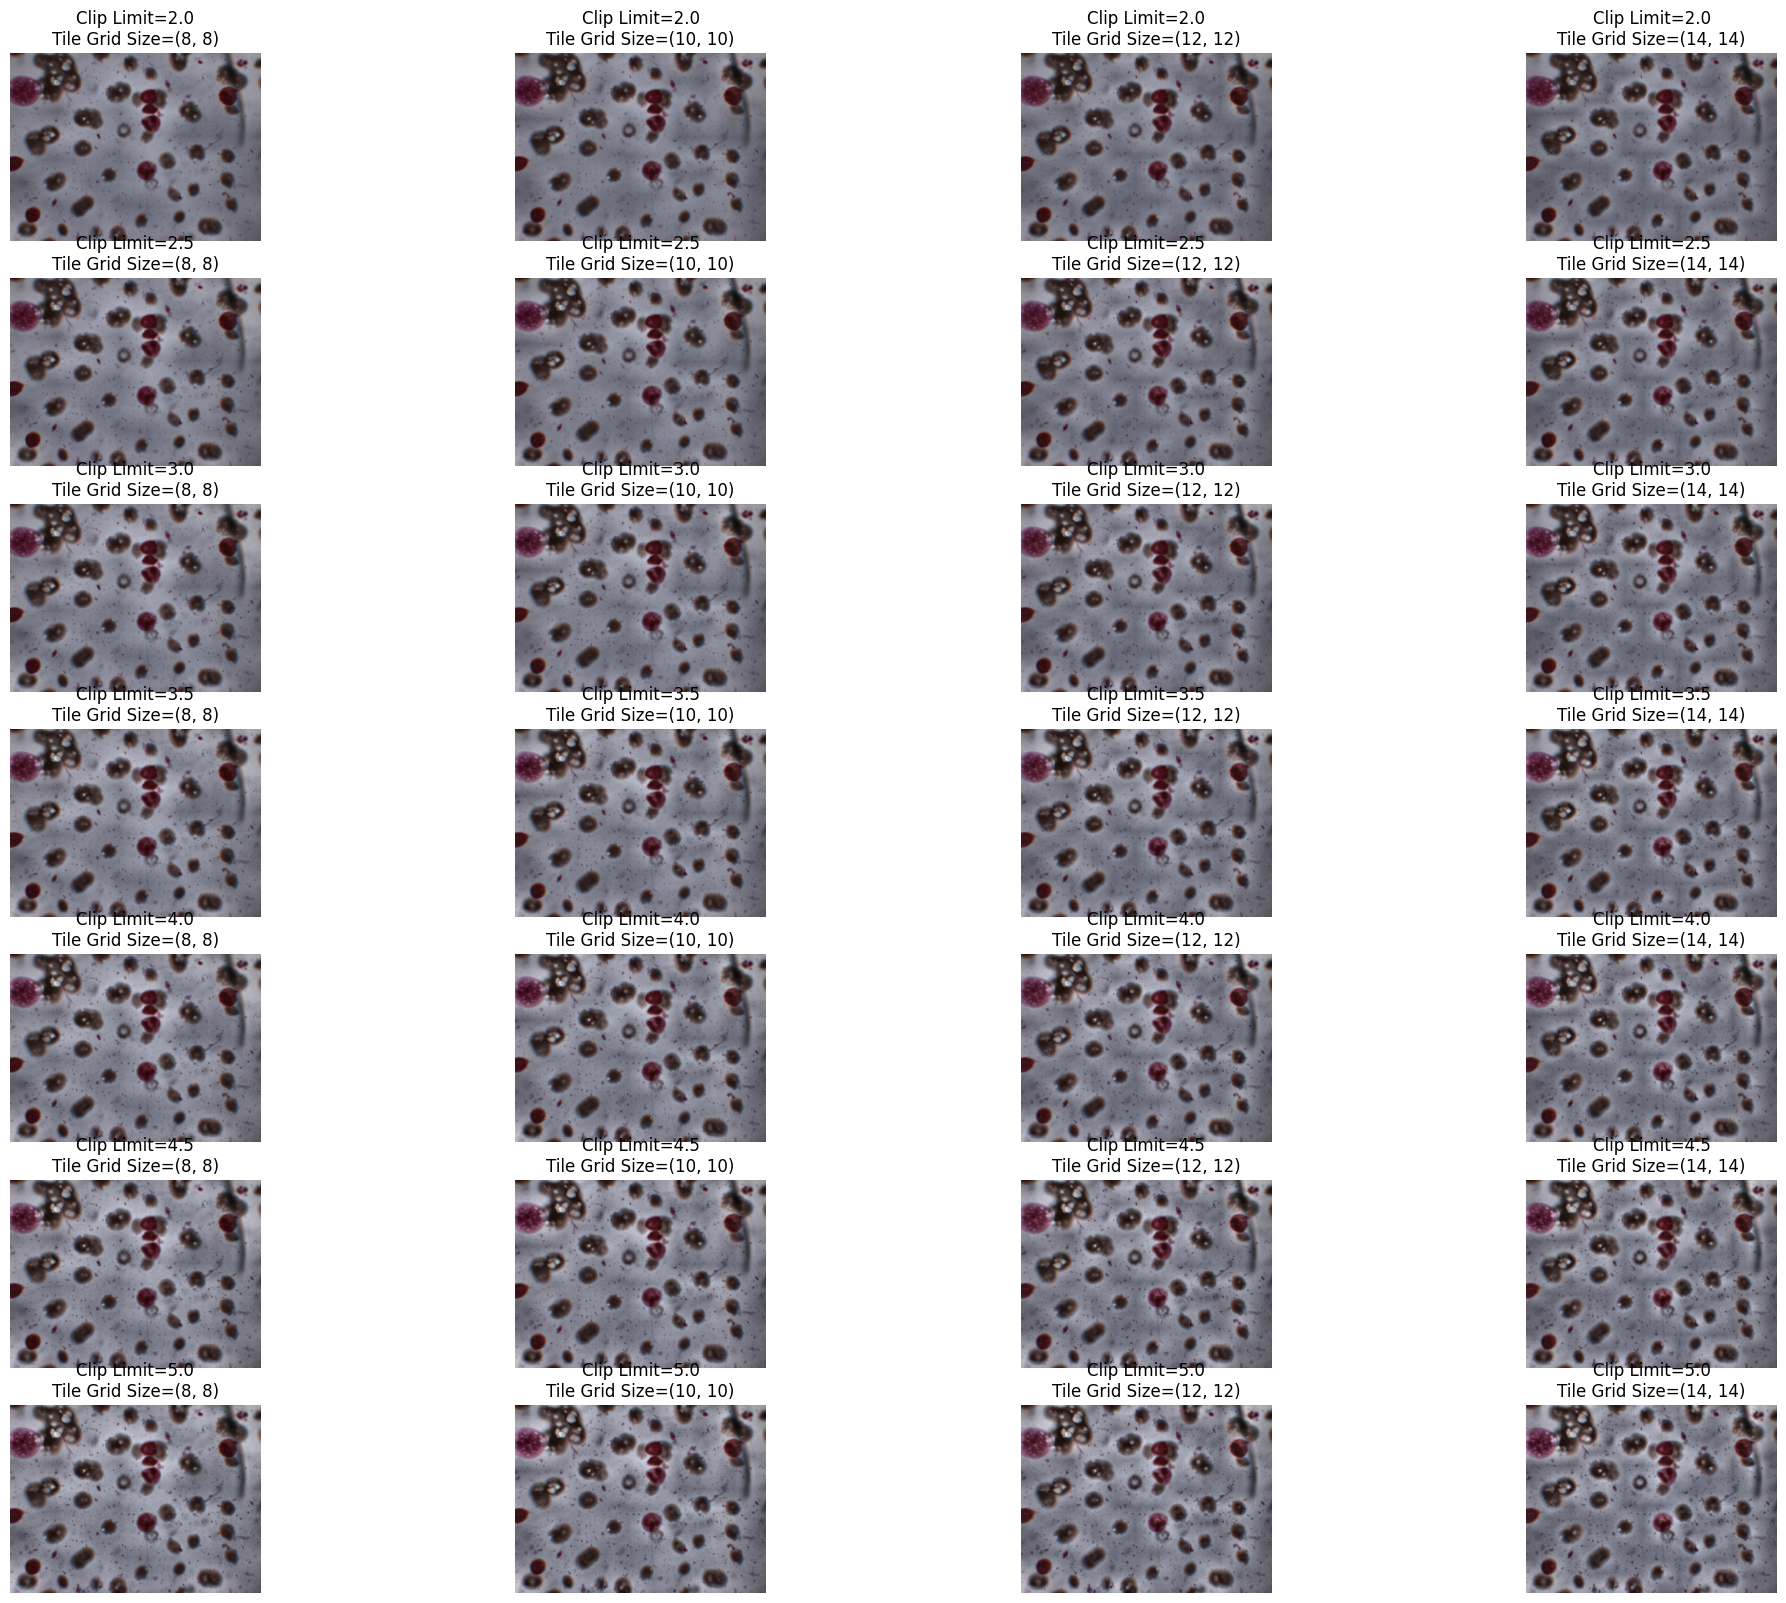

In [46]:
# Aplicar CLAHE com hiperparâmetros variáveis
clipLimits = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
tileGridSizes = [(8, 8), (10, 10), (12, 12), (14, 14)]
plt.figure(figsize=(25, 20))

plot_num = 1
for clipLimit in clipLimits:
    for tileGridSize in tileGridSizes:
        clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
        equalized_l = clahe.apply(l_channel)
        lab_equalized = cv2.merge((equalized_l, a_channel, b_channel))
        clahe_image = cv2.cvtColor(lab_equalized, cv2.COLOR_Lab2BGR)

        plt.subplot(len(clipLimits), len(tileGridSizes), plot_num)
        plt.title(f'Clip Limit={clipLimit}\nTile Grid Size={tileGridSize}')
        plt.imshow(clahe_image)
        plt.axis('off')

        plot_num += 1

plt.show()

## Aplying Pil.Enhance to all D2 images

In [49]:
OUTPUT_DATASET_FOLDER = Path.cwd().joinpath('.\data-preproc\d2-pilEnhance')
OUTPUT_DATASET_FOLDER.mkdir(parents=True, exist_ok=False)
# IMAGE_DATASET_FOLDER = Path('..\data\d2\images')

FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: 'c:\\Users\\ynk9a\\OneDrive\\Documentos\\TCC\\Leishmania\\semana18\\data-preproc\\d2-pilEnhance'

In [54]:
factor = 1.5
total_imgs_found = len(list(IMAGE_DATASET_FOLDER.glob('*.jpg')))
for path in IMAGE_DATASET_FOLDER.glob('*.jpg'):
    with Image.open(path) as img:
        contrast = Contrast(img)
        img_contrast = contrast.enhance(factor)
        output_name = path.stem + '_enhanced.jpg'
        img_contrast.save(OUTPUT_DATASET_FOLDER / output_name)

print(f'{total_imgs_found} enhanced images saved at {OUTPUT_DATASET_FOLDER.name} folder!')

68 enhanced images saved at d2-pilEnhance folder!


## Creating patches for D2 images
code available at dynamic_patcher ipynb file